# Import Libraries¶

In [85]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split,RandomizedSearchCV

from sklearn.linear_model import LinearRegression,Lasso,Ridge

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# Data Gathering

In [86]:
df=pd.read_csv('training_set.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [87]:
print(df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# EDA

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [89]:
df['MSSubClass'].unique().shape

(15,)

<Axes: >

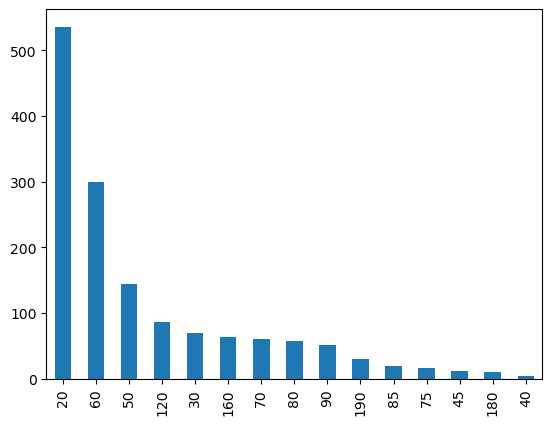

In [90]:
df['MSSubClass'].value_counts().plot(kind='bar')

In [91]:
j=df.groupby(by=['MSSubClass'])[['SalePrice']].max()
j.sort_values(by=['SalePrice'],ascending=False)

,SalePrice
MSSubClass,
60,755000
20,611657
75,475000
50,410000
120,392500
70,359100
80,345000
40,260000
160,239000


In [92]:
g=df.groupby(by=['MSSubClass'])[['SalePrice']].mean()
g.sort_values(by=['SalePrice'],ascending=False)

,SalePrice
MSSubClass,
60,239948.501672
120,200779.080460
75,192437.500000
20,185224.811567
80,169736.551724
70,166772.416667
40,156125.000000
85,147810.000000
50,143302.972222


# MSZoning

In [93]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [94]:
df['MSZoning'].unique().shape

(5,)

# LotFrontage

In [95]:
df['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

# LotArea

In [96]:
df['LotArea'].value_counts()

7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: LotArea, Length: 1073, dtype: int64

In [97]:
df['LotArea'].info

<bound method Series.info of 0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
1455     7917
1456    13175
1457     9042
1458     9717
1459     9937
Name: LotArea, Length: 1460, dtype: int64>

# Seperate categorical and continuous

In [98]:
x=df.drop(['SalePrice','Id'],axis=1)
y=df['SalePrice']

In [99]:
cat=x.select_dtypes(include='object')
con=x.select_dtypes(exclude='object')

In [100]:
cat

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [101]:
con

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,460,0,40,0,0,0,0,0,8,2007
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,500,349,0,0,0,0,0,0,2,2010
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,252,0,60,0,0,0,0,2500,5,2010
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,240,366,0,112,0,0,0,0,4,2010


# Categorical Column Selection

In [102]:
cat['SalePrice']=df['SalePrice']
cat

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,208500
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,181500
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,223500
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,140000
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,175000
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,210000
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal,266500
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal,142125


In [103]:
cat.isna().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

In [104]:
cat['Alley']=cat['Alley'].fillna(cat['Alley'].mode().iloc[0])

In [105]:
cat['BsmtQual']=cat['BsmtQual'].fillna(cat['BsmtQual'].mode().iloc[0])
cat['BsmtCond']=cat['BsmtCond'].fillna(cat['BsmtCond'].mode().iloc[0])
cat['BsmtExposure']=cat['BsmtExposure'].fillna(cat['BsmtExposure'].mode().iloc[0])
cat['BsmtFinType1']=cat['BsmtFinType1'].fillna(cat['BsmtFinType1'].mode().iloc[0])
                

In [106]:
cat['BsmtFinType2'] = cat['BsmtFinType2'].fillna(cat['BsmtFinType2'].mode().iloc[0])
cat['Electrical'] = cat['Electrical'].fillna(cat['Electrical'].mode().iloc[0])
cat['FireplaceQu'] = cat['FireplaceQu'].fillna(cat['FireplaceQu'].mode().iloc[0])
cat['GarageType'] = cat['GarageType'].fillna(cat['GarageType'].mode().iloc[0])
cat['GarageFinish'] = cat['GarageFinish'].fillna(cat['GarageFinish'].mode().iloc[0])
cat['GarageQual'] = cat['GarageQual'].fillna(cat['GarageQual'].mode().iloc[0])
cat['GarageCond'] = cat['GarageCond'].fillna(cat['GarageCond'].mode().iloc[0])
cat['PoolQC'] = cat['PoolQC'].fillna(cat['PoolQC'].mode().iloc[0])
cat['Fence'] = cat['Fence'].fillna(cat['Fence'].mode().iloc[0])
cat['MiscFeature'] = cat['MiscFeature'].fillna(cat['MiscFeature'].mode().iloc[0])


In [107]:
cat.isna().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       8
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

In [108]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [109]:
imp_col=[]

def col_selector(df,target):
    for i in df.columns:                  #iterate all the column
        model=ols('target~df[i]',df).fit()
        q=anova_lm(model)
        c=q.iloc[0:1,4:5]
        p_val=c.values[0][0]
        print(f'Column name:{i}, p value : {p_val}')
        if p_val<0.05:
            imp_col.append(i)

In [110]:
col_selector(cat,cat[['SalePrice']])

Column name:MSZoning, p value : 8.8176338662734e-35
Column name:Street, p value : 0.11704860406782483
Column name:Alley, p value : 0.290964797330703
Column name:LotShape, p value : 6.447523852011766e-25
Column name:LandContour, p value : 2.742216752138124e-08
Column name:Utilities, p value : 0.5847167739689381
Column name:LotConfig, p value : 3.163167473604189e-06
Column name:LandSlope, p value : 0.1413963584114019
Column name:Neighborhood, p value : 1.558600282770445e-225
Column name:Condition1, p value : 8.904549416138853e-08
Column name:Condition2, p value : 0.043425658360948464
Column name:BldgType, p value : 2.0567364604967015e-10
Column name:HouseStyle, p value : 3.376776535121222e-25
Column name:RoofStyle, p value : 3.653523047098502e-17
Column name:RoofMatl, p value : 7.231444779987188e-08
Column name:Exterior1st, p value : 2.5860887286373744e-43
Column name:Exterior2nd, p value : 4.842185670698891e-43
Column name:MasVnrType, p value : 4.793331178119739e-65
Column name:ExterQua

In [111]:
imp_col

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'SaleType',
 'SaleCondition',
 'SalePrice']

In [112]:
cat1=pd.DataFrame(cat,columns=imp_col)
cat1.drop(['SalePrice'],axis=1,inplace=True)
cat1

,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,...,Gd,Attchd,RFn,TA,TA,Y,Gd,MnPrv,WD,Normal
1,RL,Reg,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,...,TA,Attchd,RFn,TA,TA,Y,Gd,MnPrv,WD,Normal
2,RL,IR1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,...,TA,Attchd,RFn,TA,TA,Y,Gd,MnPrv,WD,Normal
3,RL,IR1,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,...,Gd,Detchd,Unf,TA,TA,Y,Gd,MnPrv,WD,Abnorml
4,RL,IR1,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,...,TA,Attchd,RFn,TA,TA,Y,Gd,MnPrv,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Reg,Lvl,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,...,TA,Attchd,RFn,TA,TA,Y,Gd,MnPrv,WD,Normal
1456,RL,Reg,Lvl,Inside,NWAmes,Norm,Norm,1Fam,1Story,Gable,...,TA,Attchd,Unf,TA,TA,Y,Gd,MnPrv,WD,Normal
1457,RL,Reg,Lvl,Inside,Crawfor,Norm,Norm,1Fam,2Story,Gable,...,Gd,Attchd,RFn,TA,TA,Y,Gd,GdPrv,WD,Normal
1458,RL,Reg,Lvl,Inside,NAmes,Norm,Norm,1Fam,1Story,Hip,...,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,WD,Normal


# Numerical Column Selection

In [113]:
con

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,460,0,40,0,0,0,0,0,8,2007
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,500,349,0,0,0,0,0,0,2,2010
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,252,0,60,0,0,0,0,2500,5,2010
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,240,366,0,112,0,0,0,0,4,2010


In [114]:
con.isna().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [115]:
for i in con.columns:
    if con[i].dtypes=='object':
        con[i]=con[i].fillna(con[i].mode().iloc[0])
    else:
        con[i]=con[i].fillna(con[i].median())

In [116]:
con.isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [117]:
from sklearn.preprocessing import StandardScaler

In [118]:
ss=StandardScaler()

In [119]:
con1=pd.DataFrame(ss.fit_transform(con),columns=ss.get_feature_names_out())
con1

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,...,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,...,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
2,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,...,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777
3,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,...,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
4,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,...,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.357114,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.570750,-0.973018,-0.288653,...,-0.060731,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614439
1456,-0.872563,0.687385,0.266407,-0.071836,0.381743,0.222975,0.151865,0.087911,0.759659,0.722112,...,0.126420,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.645210
1457,0.309859,-0.175462,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.570750,-0.369871,-0.288653,...,-1.033914,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,1.645210
1458,-0.872563,-0.084636,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.570750,-0.865548,6.092188,...,-1.090059,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,1.645210


In [120]:
from statsmodels.api import add_constant,OLS

In [121]:
ols=OLS(y,add_constant(con1))
model=ols.fit()

In [122]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     182.4
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        10:50:18   Log-Likelihood:                -17319.
No. Observations:                1460   AIC:                         3.471e+04
Df Residuals:                    1425   BIC:                         3.489e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.809e+05    909.365    198.953      0.000    1.79e+05    1.83e+05
MSSubClass    -7683.7049   1170.209     -6.566      0.000   -9979.222   -5388.188
LotFrontage   -1198.7064   1138.751     -1.053      0.293   -3432.515    1035.102
LotArea        4287.4531   1018.539      4.209      0.000    2289.456    6285.450
OverallQual    2.396e+04   1641.671     14.597      0.000    2.07e+04    2.72e+04
OverallCond    5198.8870   1148.631      4.526      0.000    2945.697    7452.077
YearBuilt      8127.0239   2035.135      3.993      0.000    4134.841    1.21e+04
YearRemodAdd   2777.7953   1415.573      1.962      0.050       0.964    5554.627
MasVnrArea     5662.9957   1071.910      5.283      0.000    3560.305    7765.686
BsmtFinSF1     4338.6672   1012.694      4.284      0.000    2352.136    6325.199
BsmtFinSF2     -229.2459    926.906     -0.247      0.805   -2047.493    1589.001
BsmtUnfSF      -173.0495    876.409     -0.197      0.844   -1892.240    1546.141
TotalBsmtSF    4252.0824   1249.268      3.404      0.001    1801.481    6702.683
1stFlrSF       8483.1361   1482.568      5.722      0.000    5574.886    1.14e+04
2ndFlrSF       9590.7602   1294.226      7.410      0.000    7051.968    1.21e+04
LowQualFinSF    -84.3569    963.759     -0.088      0.930   -1974.895    1806.181
GrLivArea       1.42e+04   1350.446     10.515      0.000    1.16e+04    1.68e+04
BsmtFullBath   4861.5118   1354.819      3.588      0.000    2203.857    7519.166
BsmtHalfBath    490.4456    976.434      0.502      0.616   -1424.956    2405.847
FullBath       1898.3985   1562.285      1.215      0.225   -1166.226    4963.023
HalfBath       -941.0063   1338.686     -0.703      0.482   -3567.012    1684.999
BedroomAbvGr  -8230.5326   1387.675     -5.931      0.000    -1.1e+04   -5508.427
KitchenAbvGr  -2680.6813   1147.994     -2.335      0.020   -4932.621    -428.742
TotRmsAbvGrd   8197.0962   2009.934      4.078      0.000    4254.350    1.21e+04
Fireplaces     2564.1263   1144.961      2.239      0.025     318.137    4810.116
GarageYrBlt    3044.8703   1654.754      1.840      0.066    -201.145    6290.886
GarageCars     8437.6782   2148.892      3.927      0.000    4222.347    1.27e+04
GarageArea     -942.4663   2124.820     -0.444      0.657   -5110.578    3225.645
WoodDeckSF     2993.5753   1003.928      2.982      0.003    1024.240    4962.911
OpenPorchSF    -191.4887   1005.537     -0.190      0.849   -2163.981    1781.003
EnclosedPorch   727.6176   1030.365      0.706      0.480   -1293.577    2748.812
3SsnPorch       595.3948    919.978      0.647      0.518   -1209.261    2400.051
ScreenPorch    3120.6011    958.185      3.257      0.001    1240.997    5000.205
PoolArea      -1172.1918    956.227     -1.226      0.220   -3047.955     703.571
MiscVal        -363.8155    919.926     -0.395   

In [123]:
k=model.pvalues.sort_values(ascending=True).index
k

Index(['const', 'OverallQual', 'GrLivArea', '2ndFlrSF', 'MSSubClass',
       'BedroomAbvGr', '1stFlrSF', 'MasVnrArea', 'OverallCond', 'BsmtFinSF1',
       'LotArea', 'TotRmsAbvGrd', 'YearBuilt', 'GarageCars', 'BsmtFullBath',
       'TotalBsmtSF', 'ScreenPorch', 'WoodDeckSF', 'KitchenAbvGr',
       'Fireplaces', 'YearRemodAdd', 'GarageYrBlt', 'PoolArea', 'FullBath',
       'YrSold', 'LotFrontage', 'EnclosedPorch', 'HalfBath', '3SsnPorch',
       'BsmtHalfBath', 'GarageArea', 'MiscVal', 'BsmtFinSF2', 'BsmtUnfSF',
       'OpenPorchSF', 'MoSold', 'LowQualFinSF'],
      dtype='object')

In [124]:
imp_columns=k[0:10]
imp_columns

Index(['const', 'OverallQual', 'GrLivArea', '2ndFlrSF', 'MSSubClass',
       'BedroomAbvGr', '1stFlrSF', 'MasVnrArea', 'OverallCond', 'BsmtFinSF1'],
      dtype='object')

In [125]:
list1=['const', 'OverallQual', 'GrLivArea', '2ndFlrSF', 'MSSubClass',
       'BedroomAbvGr', '1stFlrSF', 'MasVnrArea', 'OverallCond', 'BsmtFinSF1']

In [126]:
con2=pd.DataFrame(con,columns=list1)
con2

,const,OverallQual,GrLivArea,2ndFlrSF,MSSubClass,BedroomAbvGr,1stFlrSF,MasVnrArea,OverallCond,BsmtFinSF1
0,NaN,7,1710,854,60,3,856,196.0,5,706
1,NaN,6,1262,0,20,3,1262,0.0,8,978
2,NaN,7,1786,866,60,3,920,162.0,5,486
3,NaN,7,1717,756,70,3,961,0.0,5,216
4,NaN,8,2198,1053,60,4,1145,350.0,5,655
...,...,...,...,...,...,...,...,...,...,...
1455,NaN,6,1647,694,60,3,953,0.0,5,0
1456,NaN,6,2073,0,20,3,2073,119.0,6,790
1457,NaN,7,2340,1152,70,4,1188,0.0,9,275
1458,NaN,5,1078,0,20,2,1078,0.0,6,49


In [127]:
x2=cat1.join(con2)
x2

,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,...,const,OverallQual,GrLivArea,2ndFlrSF,MSSubClass,BedroomAbvGr,1stFlrSF,MasVnrArea,OverallCond,BsmtFinSF1
0,RL,Reg,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,...,NaN,7,1710,854,60,3,856,196.0,5,706
1,RL,Reg,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,...,NaN,6,1262,0,20,3,1262,0.0,8,978
2,RL,IR1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,...,NaN,7,1786,866,60,3,920,162.0,5,486
3,RL,IR1,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,...,NaN,7,1717,756,70,3,961,0.0,5,216
4,RL,IR1,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,...,NaN,8,2198,1053,60,4,1145,350.0,5,655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Reg,Lvl,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,...,NaN,6,1647,694,60,3,953,0.0,5,0
1456,RL,Reg,Lvl,Inside,NWAmes,Norm,Norm,1Fam,1Story,Gable,...,NaN,6,2073,0,20,3,2073,119.0,6,790
1457,RL,Reg,Lvl,Inside,Crawfor,Norm,Norm,1Fam,2Story,Gable,...,NaN,7,2340,1152,70,4,1188,0.0,9,275
1458,RL,Reg,Lvl,Inside,NAmes,Norm,Norm,1Fam,1Story,Hip,...,NaN,5,1078,0,20,2,1078,0.0,6,49


# Data Preprocessing

In [128]:
cat2=[]
con2=[]

for i in x2.columns:
    if x2[i].dtypes=='object':
        cat2.append(i)
    else:
        con2.append(i)

In [129]:
cat2

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'SaleType',
 'SaleCondition']

In [130]:
con2

['const',
 'OverallQual',
 'GrLivArea',
 '2ndFlrSF',
 'MSSubClass',
 'BedroomAbvGr',
 '1stFlrSF',
 'MasVnrArea',
 'OverallCond',
 'BsmtFinSF1']

In [131]:
num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='median')),('scalar',StandardScaler())])
cat_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),('encode',OneHotEncoder())])

In [132]:
pre=ColumnTransformer([('num_pipe',num_pipe,con2),('cat_pipe',cat_pipe,cat2)])
pre

ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scalar', StandardScaler())]),
                                 ['const', 'OverallQual', 'GrLivArea',
                                  '2ndFlrSF', 'MSSubClass', 'BedroomAbvGr',
                                  '1stFlrSF', 'MasVnrArea', 'OverallCond',
                                  'BsmtFinSF1']),
                                ('cat_pipe',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode',...
                                  'LotConfig', 'Neighborhood', 'Condition1',
                                  'Condition2', 'BldgType', 'HouseStyle',
                                  'RoofStyle', 'RoofMatl', 'Exterior1st',
                                  'Exterior2nd', 'MasVnrType', 'ExterQual',
                                  'ExterCond', 'Foundation', 'BsmtQual',
                                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                                  'BsmtFinType2', 'Heating', 'HeatingQC',
                                  'CentralAir', 'Electrical', 'KitchenQual',
                                  'Functional', 'FireplaceQu', 'GarageType', ...])])

In [133]:
x3=pd.DataFrame(pre.fit_transform(x2).toarray(),columns=pre.get_feature_names_out())
x3

,num_pipe__OverallQual,num_pipe__GrLivArea,num_pipe__2ndFlrSF,num_pipe__MSSubClass,num_pipe__BedroomAbvGr,num_pipe__1stFlrSF,num_pipe__MasVnrArea,num_pipe__OverallCond,num_pipe__BsmtFinSF1,cat_pipe__MSZoning_C (all),...,cat_pipe__SaleType_ConLw,cat_pipe__SaleType_New,cat_pipe__SaleType_Oth,cat_pipe__SaleType_WD,cat_pipe__SaleCondition_Abnorml,cat_pipe__SaleCondition_AdjLand,cat_pipe__SaleCondition_Alloca,cat_pipe__SaleCondition_Family,cat_pipe__SaleCondition_Normal,cat_pipe__SaleCondition_Partial
0,0.651479,0.370333,1.161852,0.073375,0.163779,-0.793434,0.514104,-0.517200,0.575425,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.071836,-0.482512,-0.795163,-0.872563,0.163779,0.257140,-0.570750,2.179628,1.171992,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.651479,0.515013,1.189351,0.073375,0.163779,-0.627826,0.325915,-0.517200,0.092907,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.651479,0.383659,0.937276,0.309859,0.163779,-0.521734,-0.570750,-0.517200,-0.499274,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.374795,1.299326,1.617877,0.073375,1.390023,-0.045611,1.366489,-0.517200,0.463568,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.071836,0.250402,0.795198,0.073375,0.163779,-0.542435,-0.570750,-0.517200,-0.973018,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,-0.071836,1.061367,-0.795163,-0.872563,0.163779,2.355701,0.087911,0.381743,0.759659,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,0.651479,1.569647,1.844744,0.309859,1.390023,0.065656,-0.570750,3.078570,-0.369871,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,-0.795151,-0.832788,-0.795163,-0.872563,-1.062465,-0.218982,-0.570750,0.381743,-0.865548,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Train Test Split

In [134]:
x_train,x_test,y_train,y_test=train_test_split(x3,y,test_size=0.2,random_state=23)

# Model Building

In [135]:
lr=LinearRegression()

In [136]:
lr.fit(x_train,y_train)

LinearRegression()

# Training data Evaluation of Model

In [137]:
y_pred_train=lr.predict(x_train)

mse=mean_squared_error(y_pred_train,y_train)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_pred_train,y_train)
r=r2_score(y_pred_train,y_train)

print('MSE:',mse)
print('RMSE:',rmse)
print('MAE:',mae)
print('R2 Score:',r)

MSE: 509480764.2996575
RMSE: 22571.680582084657
MAE: 14715.02397260274
R2 Score: 0.9165810572351301


# Testing Data Evaluation

In [138]:
y_pred_test=lr.predict(x_test)

mse1=mean_squared_error(y_pred_test,y_test)
rmse1=np.sqrt(mse1)
mae1=mean_absolute_error(y_pred_test,y_test)
r1=r2_score(y_pred_test,y_test)

print('MSE:',mse1)
print('RMSE:',rmse1)
print('MAE:',mae1)
print('R2 Score:',r1)

MSE: 1.3790186867885792e+28
RMSE: 117431626352894.36
MAE: 10621908141178.113
R2 Score: -0.00537368427338758


# Lasso

In [139]:
la=Lasso()

In [140]:
la.fit(x_train,y_train)

Lasso()

# Evaluation of Training data

In [141]:
y_pred_train=la.predict(x_train)

mse=mean_squared_error(y_pred_train,y_train)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_pred_train,y_train)
r=r2_score(y_pred_train,y_train)

print('MSE:',mse)
print('RMSE:',rmse)
print('MAE:',mae)
print('R2 Score:',r)

MSE: 509594602.0046212
RMSE: 22574.202134397157
MAE: 14716.701652742355
R2 Score: 0.9164541168515433


# Evaluation of Testing data

In [142]:
y_pred_test=la.predict(x_test)

mse1=mean_squared_error(y_pred_test,y_test)
rmse1=np.sqrt(mse1)
mae1=mean_absolute_error(y_pred_test,y_test)
r1=r2_score(y_pred_test,y_test)

print('MSE:',mse1)
print('RMSE:',rmse1)
print('MAE:',mae1)
print('R2 Score:',r1)

MSE: 573189425.8071233
RMSE: 23941.374768528294
MAE: 17504.115552136358
R2 Score: 0.88549781138878


# Ridge

In [143]:
ra=Ridge()

In [144]:
ra.fit(x_train,y_train)

Ridge()

# Training data Evaluation

In [145]:
y_pred_train=ra.predict(x_train)

mse=mean_squared_error(y_pred_train,y_train)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_pred_train,y_train)
r=r2_score(y_pred_train,y_train)

print('MSE:',mse)
print('RMSE:',rmse)
print('MAE:',mae)
print('R2 Score:',r)

MSE: 583944208.8224746
RMSE: 24164.937591942475
MAE: 15638.25826726593
R2 Score: 0.9006912322339693


# Testing data Evaluation

In [146]:
y_pred_test=ra.predict(x_test)

mse1=mean_squared_error(y_pred_test,y_test)
rmse1=np.sqrt(mse1)
mae1=mean_absolute_error(y_pred_test,y_test)
r1=r2_score(y_pred_test,y_test)

print('MSE:',mse1)
print('RMSE:',rmse1)
print('MAE:',mae1)
print('R2 Score:',r1)

MSE: 594629205.327999
RMSE: 24385.02010103742
MAE: 17941.39005733177
R2 Score: 0.8779913682010609


# Hyperparameter Tuning for lasso

In [147]:
grid={'alpha':np.arange(0,3,0.01)}

In [148]:
rs=RandomizedSearchCV(la,param_distributions=grid,cv=2)
rs.fit(x_train,y_train)

RandomizedSearchCV(cv=2, estimator=Lasso(),
                   param_distributions={'alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55...
       2.2 , 2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 ,
       2.31, 2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41,
       2.42, 2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52,
       2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63,
       2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74,
       2.75, 2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85,
       2.86, 2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96,
       2.97, 2.98, 2.99])})

In [149]:
rs.best_params_

{'alpha': 2.86}

In [150]:
la1=rs.best_estimator_
la1

Lasso(alpha=2.86)

# Training Data Evaluation

In [151]:
y_pred_train=la1.predict(x_train)

mse=mean_squared_error(y_pred_train,y_train)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_pred_train,y_train)
r=r2_score(y_pred_train,y_train)

print('MSE:',mse)
print('RMSE:',rmse)
print('MAE:',mae)
print('R2 Score:',r)

MSE: 510216067.2271981
RMSE: 22587.962883518252
MAE: 14726.241970301753
R2 Score: 0.9161918088717473


# Testing Data Evaluation

In [152]:
y_pred_test=la1.predict(x_test)

mse1=mean_squared_error(y_pred_test,y_test)
rmse1=np.sqrt(mse1)
mae1=mean_absolute_error(y_pred_test,y_test)
r1=r2_score(y_pred_test,y_test)

print('MSE:',mse1)
print('RMSE:',rmse1)
print('MAE:',mae1)
print('R2 Score:',r1)

MSE: 562279916.2387668
RMSE: 23712.442224257855
MAE: 17321.715736518083
R2 Score: 0.8873392564747334


# Hyperparameter Tuning for Ridge

In [153]:
grid

{'alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
        0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
        0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
        0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
        1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ,
        1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31,
        1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42,
        1.43, 1.44, 1.45, 1.4

In [154]:
rs=RandomizedSearchCV(ra,param_distributions=grid,cv=2)
rs.fit(x_train,y_train)

RandomizedSearchCV(cv=2, estimator=Ridge(),
                   param_distributions={'alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55...
       2.2 , 2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 ,
       2.31, 2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41,
       2.42, 2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52,
       2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63,
       2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74,
       2.75, 2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85,
       2.86, 2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96,
       2.97, 2.98, 2.99])})

In [155]:
rs.best_params_

{'alpha': 0.81}

In [156]:
ra1=rs.best_estimator_
ra1

Ridge(alpha=0.81)

# Training Data Evaluation

In [157]:
y_pred_train=ra1.predict(x_train)

mse=mean_squared_error(y_pred_train,y_train)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_pred_train,y_train)
r=r2_score(y_pred_train,y_train)

print('MSE:',mse)
print('RMSE:',rmse)
print('MAE:',mae)
print('R2 Score:',r)

MSE: 571541570.0967424
RMSE: 23906.935606571213
MAE: 15526.546828225039
R2 Score: 0.9031115546120269


# Testing Data Evaluation

In [158]:
y_pred_test=ra1.predict(x_test)

mse1=mean_squared_error(y_pred_test,y_test)
rmse1=np.sqrt(mse1)
mae1=mean_absolute_error(y_pred_test,y_test)
r1=r2_score(y_pred_test,y_test)

print('MSE:',mse1)
print('RMSE:',rmse1)
print('MAE:',mae1)
print('R2 Score:',r1)

MSE: 596534797.9830459
RMSE: 24424.061864952888
MAE: 17937.37683639999
R2 Score: 0.8780036021900268


# Unseen Data Prediction

In [159]:
df2=pd.read_csv('testing_set.csv')
df2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [160]:
print(df2.columns)


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [161]:
if 'const' not in df2.columns:
    df2['const'] = 1


In [162]:
print(df2.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [163]:
x4 = pd.DataFrame(pre.transform(df2).toarray(), columns=pre.get_feature_names_out())
x4

,num_pipe__OverallQual,num_pipe__GrLivArea,num_pipe__2ndFlrSF,num_pipe__MSSubClass,num_pipe__BedroomAbvGr,num_pipe__1stFlrSF,num_pipe__MasVnrArea,num_pipe__OverallCond,num_pipe__BsmtFinSF1,cat_pipe__MSZoning_C (all),...,cat_pipe__SaleType_ConLw,cat_pipe__SaleType_New,cat_pipe__SaleType_Oth,cat_pipe__SaleType_WD,cat_pipe__SaleCondition_Abnorml,cat_pipe__SaleCondition_AdjLand,cat_pipe__SaleCondition_Alloca,cat_pipe__SaleCondition_Family,cat_pipe__SaleCondition_Normal,cat_pipe__SaleCondition_Partial
0,-0.795151,-1.179256,-0.795163,-0.872563,-1.062465,-0.689929,-0.570750,0.381743,0.053428,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.071836,-0.354966,-0.795163,-0.872563,0.163779,0.430511,0.027027,0.381743,1.051363,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.795151,0.216136,0.811239,0.073375,0.163779,-0.607125,-0.570750,-0.517200,0.761852,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.071836,0.168544,0.758532,0.073375,0.163779,-0.612300,-0.460051,0.381743,0.347326,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.374795,-0.448246,-0.795163,1.492282,-1.062465,0.303718,-0.570750,-0.517200,-0.396190,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-1.518467,-0.806136,0.456043,2.438219,0.163779,-1.595596,-0.570750,1.280685,-0.973018,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1455,-1.518467,-0.806136,0.456043,2.438219,0.163779,-1.595596,-0.570750,-0.517200,-0.420316,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1456,-0.795151,-0.554851,-0.795163,-0.872563,1.390023,0.158811,-0.570750,1.280685,1.711535,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1457,-0.795151,-1.038384,-0.795163,0.664586,0.163779,-0.498445,-0.570750,-0.517200,-0.233889,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [164]:
pred=la1.predict(x4)
pred

array([ 97887.09816792, 161536.49205694, 178500.76101363, ...,
       166747.69826493, 107374.99984127, 211693.26650764])

In [165]:
New_df=df2[['Id']]
New_df

,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


In [166]:
New_df['Prediction']=pred

In [167]:
New_df

,Id,Prediction
0,1461,97887.098168
1,1462,161536.492057
2,1463,178500.761014
3,1464,186480.252440
4,1465,216030.160480
...,...,...
1454,2915,76984.959529
1455,2916,72019.079899
1456,2917,166747.698265
1457,2918,107374.999841


In [168]:
New_df.to_csv('Result.csv',index=False)